In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from PIL import Image
import matplotlib.ticker as tkr

In [2]:
DATASETPATH = '../dataset.evaluation/'

# Reproduce results from the paper
Reproduce results from Table 3 - row `shape, Pcirc=0.5`

In [3]:
evaluation_results = pd.read_csv(os.path.join(DATASETPATH, 'velocities_prediction', 'evaluation.csv_crop256'))

In [4]:
# RMSE for the velocity reported in the paper: 1.90E-02
np.sqrt(np.mean(evaluation_results['mse']))

0.019012181858337984

## Tortuosity

In [5]:
# R2 for tortuosity reported in the paper: 0.941
r2_score(evaluation_results['tortuosity_target'], evaluation_results['tortuosity_pred'])

0.9415165692614088

In [6]:
# RMSE for tortuosity reported in the paper: 1.7E-02
np.sqrt(mean_squared_error(evaluation_results['tortuosity_target'], evaluation_results['tortuosity_pred']))

0.016898798317365366

In [7]:
# RMSE for tortuosity reported in the paper: 1.15
mean_absolute_percentage_error(evaluation_results['tortuosity_target'], evaluation_results['tortuosity_pred'])*100

1.1495951578707722

Text(0, 0.5, 'Predicted tortuosity')

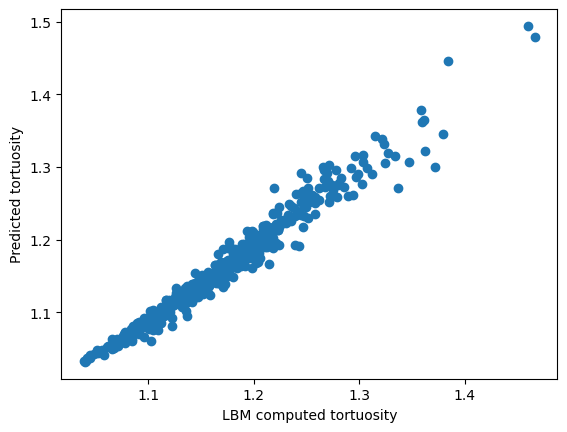

In [8]:
plt.plot(evaluation_results['tortuosity_target'], evaluation_results['tortuosity_pred'], 'o')
plt.xlabel('LBM computed tortuosity')
plt.ylabel('Predicted tortuosity')

## Permeability

In [9]:
r2_score(evaluation_results['permeability_target'], evaluation_results['permeability_pred'])

0.9806180176643566

In [10]:
np.sqrt(mean_squared_error(evaluation_results['permeability_target'], evaluation_results['permeability_pred']))

8558.250956795813

In [11]:
mean_absolute_percentage_error(evaluation_results['permeability_target'], evaluation_results['permeability_pred'])

0.045894935102599094

Text(0, 0.5, 'Predicted permeability')

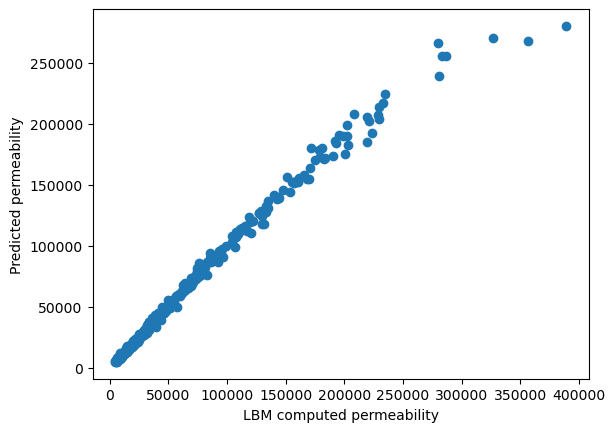

In [12]:
plt.plot(evaluation_results['permeability_target'], evaluation_results['permeability_pred'], 'o')
plt.xlabel('LBM computed permeability')
plt.ylabel('Predicted permeability')

# Visualize velocitiy field

In [13]:
grid_subsample = 8
def plot_velocity(vel, ax=None, velocity_range=None, cmap='Blues'):
    if ax == None:
        fig, ax = plt.subplots(1,1)
    vel_magnitude = np.linalg.norm(vel, axis=2)
    u = vel[::grid_subsample, ::grid_subsample, 0]
    v = vel[::grid_subsample, ::grid_subsample, 1]
    vel_magnitude_subsample =  vel_magnitude[::grid_subsample, ::grid_subsample]
   
    xs, ys = np.meshgrid(range(0, vel.shape[0], grid_subsample), range(0, vel.shape[1], grid_subsample))
    if velocity_range:
        im = ax.imshow(vel_magnitude, origin='lower', alpha=0.8, vmin=velocity_range[0], vmax=velocity_range[1], cmap=cmap)
    else:
        im = ax.imshow(vel_magnitude, origin='lower', alpha=0.8)
    #ax.quiver(xs.reshape(-1, 1), ys.reshape(-1, 1), u_masked.reshape(-1, 1), v_masked.reshape(-1, 1), color='black')
    velocity_threshold = 0.01
    mask = vel_magnitude_subsample.flatten() > velocity_threshold
    xs_keep = xs.flatten()[mask]
    ys_keep = ys.flatten()[mask]
    u_keep = u.flatten()[mask]
    v_keep = v.flatten()[mask]
    ax.quiver(xs_keep.reshape(-1, 1), ys_keep.reshape(-1, 1), u_keep.reshape(-1, 1), v_keep.reshape(-1, 1), color='black')
    return im

def plot_structure_velocity_prediction(structure, velocity_gt, velocity_pred):
    fig, axs = plt.subplots(1, 3, figsize=(12.5, 4))
    fig.subplots_adjust(right=0.88)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    velocity_max = max(np.max(np.linalg.norm(velocity_gt, axis=2)), np.max(np.linalg.norm(velocity_pred, axis=2)))
    velocity_range = (0, velocity_max)
    axs[0].imshow(1-structure,origin='lower', cmap='gray')
    _  = plot_velocity(velocity_gt, ax=axs[1], velocity_range=velocity_range)
    im = plot_velocity(velocity_pred, ax=axs[2], velocity_range=velocity_range)
    for a in axs:
        a.set_xticks([])
        a.set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0.05)
    plt.colorbar(im, cax=cbar_ax, format=tkr.FormatStrFormatter('%.3f'))
    axs[1].text(10, 240, 'LBM solution',fontsize=14, color='black', fontweight='bold')
    axs[2].text(10, 240, 'Prediction',fontsize=14, color='black', fontweight='bold')
    #plt.close()

In [14]:
def read_ground_truth(structure_name):
    structure_name = f'{structure_name}.gif'
    vel_name = f'{structure_name}.vel.npz'
    structure_filepath = os.path.join(DATASETPATH, 'structures', structure_name)
    vel_filepath = os.path.join(DATASETPATH, 'velocities_lbm', vel_name)
    structure = Image.open(structure_filepath)
    if structure.getpalette()[0] == 0:
        structure = 1-np.array(structure)
    else:
        structure = np.array(structure)
    vel = np.load(vel_filepath)['arr_0']*1_000
    return structure, vel

In [15]:
# read predicted velocities
data = pickle.load(open(os.path.join(DATASETPATH, 'velocities_prediction','predictions_evaluation.pickle'), 'rb'))

In [16]:
# display first 10 structure names for which predictions were computed
list(data.keys())[:10]

['pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.800873',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.855301',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.759995',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.781937',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.914963',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.931046',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.756653',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.860458',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.805664',
 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.749374']

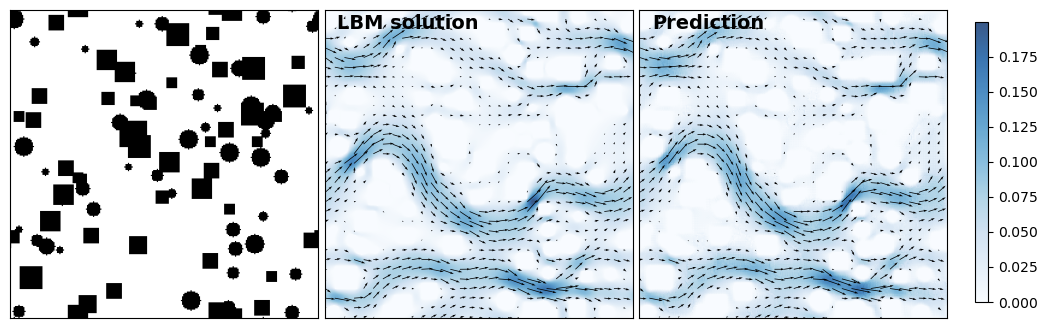

In [17]:
# take first structure and plot the velocities
structure_name = 'pcircle=0.5000_radmin=3_radmax=8_trivialporosity=0.800873'
velocity_prediction = np.moveaxis(data[structure_name], 0, 2)
structure, velocity = read_ground_truth(structure_name=structure_name)
plot_structure_velocity_prediction(structure=structure, velocity_gt=velocity, velocity_pred=velocity_prediction)